In [2]:
from mint.config import DATA_DIR
from collections import Counter
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Kiến trúc dữ liệu

In [3]:
def load_json(path):
    with open(path, 'r', encoding='utf-8') as f:
        return [json.loads(line) for line in f]

data_dir = DATA_DIR("AQuA")

train_data = load_json(os.path.join(data_dir, 'train.json'))
test_data = load_json(os.path.join(data_dir, 'test.json'))
dev_data = load_json(os.path.join(data_dir, 'dev.json'))

datas = {
    "Train": train_data,
    "Test": test_data,
    "Dev": dev_data
}

for name, data in datas.items():
    print(f"\n--- {name} ---")
    print(f"Data type of the dataset: {type(data)}")
    
    if isinstance(data, list) and len(data) > 0:
        first_element = data[0]
        print(f"Data type of the first element: {type(first_element)}")
        
        if isinstance(first_element, dict):
            print(f"Dict type: {list(first_element.keys())}")

df_train = pd.DataFrame(train_data)
df_test = pd.DataFrame(test_data)
df_dev = pd.DataFrame(dev_data)


--- Train ---
Data type of the dataset: <class 'list'>
Data type of the first element: <class 'dict'>
Dict type: ['question', 'options', 'rationale', 'correct']

--- Test ---
Data type of the dataset: <class 'list'>
Data type of the first element: <class 'dict'>
Dict type: ['question', 'options', 'rationale', 'correct']

--- Dev ---
Data type of the dataset: <class 'list'>
Data type of the first element: <class 'dict'>
Dict type: ['question', 'options', 'rationale', 'correct']


In [3]:
# Gộp tất cả các bộ dữ liệu vào một dict
datasets = {
    "Train": df_train,
    "Test": df_test,
    "Dev": df_dev  # nếu bạn đã load đầy đủ, thay df_dev=pd.DataFrame() bằng df_dev = pd.DataFrame(dev_data)
}

# Thiết lập font Tiếng Việt (chỉ áp dụng nếu hệ thống có hỗ trợ)
plt.rcParams['font.family'] = 'Arial'

In [4]:
for name, df in datasets.items():
    print(f"--- {name} Dataset ---")
    display(df.head()) 
    print("\n")

--- Train Dataset ---


,question,options,rationale,correct
0,"Two friends plan to walk along a 43-km trail, ...","[A)21, B)21.5, C)22, D)22.5, E)23]","If Q complete x kilometers, then P completes 1...",E
1,"In the coordinate plane, points (x, 1) and (5,...","[A)4 and 1, B)1 and 5, C)5 and 1, D)3 and 5, E...",Line k passes through the origin and has slope...,C
2,"For all numbers p and q, the operation @ is de...","[A)II, B)I and II, C)I and III, D)II and III, ...",p@q = p^2 - pq=p(p-q).... so p@q will be zero ...,B
3,Carl is facing very difficult financial times ...,"[A)$1600, B)$2000, C)$2150, D)$2500, E)$12000]","Usually, you are given the annual rate of inte...",A
4,The speed at which a man can row a boat in sti...,"[A)18 seconds, B)27 seconds, C)26 seconds, D)1...",Speed of the boat downstream = 25 +11\n= 36 km...,E




--- Test Dataset ---


,question,options,rationale,correct
0,"A car is being driven, in a straight line and ...","[A)5(√3 + 1), B)6(√3 + √2), C)7(√3 – 1), D)8(√...",Explanation :\nLet the height of the building ...,A
1,The original price of an item is discounted 22...,"[A)$61, B)$65, C)$67.40, D)$70, E)$78.20]",Let x be the original price of the item\nDisco...,E
2,Find out which of the following values is the ...,"[A)36, B)15, C)17, D)5, E)7]",9=3*3\n12=3*4\nThe number should definitely ha...,A
3,If the probability that Stock A will increase ...,"[A)0.22, B)0.26, C)0.37, D)0.46, E)0.63]",The probability that stock A does not increase...,B
4,A trader sold an article at a profit of 20% fo...,"[A)270, B)300, C)280, D)320, E)315]",Cost Price = Selling Price / (100+Profit%) × 1...,B




--- Dev Dataset ---


,question,options,rationale,correct
0,Three birds are flying at a fast rate of 900 k...,"[A)32400, B)6000, C)600, D)60000, E)10]",To calculate the equivalent of miles in a kilo...,A
1,A ship is leaving a port. It takes 240 seconds...,"[A)100 m, B)150 m, C)200 m, D)250 m, E)300 m]",Let the length of the ship be x metres and its...,D
2,A rectangular piece of cloth 2 feet wide was c...,"[A)6, B)18, C)24, D)36, E)48]","The question says, length of shorter piece is ...",C
3,"In the xy-coordinate plane, which of the follo...","[A)(1,1), B)(0,3), C)(2,0), D)(3,6), E)(6,3)]",For a point to satisfy the given equation for ...,B
4,A travel company wants to charter a plane to t...,"[A)7, B)9, C)13, D)27, E)45]","Additional passengers (i.e., an integer, let's...",C


# Thống kê

In [26]:
for name, df in datasets.items():
    print(f"--- {name} Dataset ---")
    display(df.info()) 
    print("\n")

--- Train Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97467 entries, 0 to 97466
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   question         97467 non-null  object
 1   options          97467 non-null  object
 2   rationale        97467 non-null  object
 3   correct          97467 non-null  object
 4   len_question     97467 non-null  int64 
 5   len_rationale    97467 non-null  int64 
 6   num_options      97467 non-null  int64 
 7   options_lengths  97467 non-null  object
 8   has_equation     97467 non-null  bool  
dtypes: bool(1), int64(3), object(5)
memory usage: 6.0+ MB


None



--- Test Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   question         254 non-null    object
 1   options          254 non-null    object
 2   rationale        254 non-null    object
 3   correct          254 non-null    object
 4   len_question     254 non-null    int64 
 5   len_rationale    254 non-null    int64 
 6   num_options      254 non-null    int64 
 7   options_lengths  254 non-null    object
 8   has_equation     254 non-null    bool  
dtypes: bool(1), int64(3), object(5)
memory usage: 16.3+ KB


None



--- Dev Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   question         254 non-null    object
 1   options          254 non-null    object
 2   rationale        254 non-null    object
 3   correct          254 non-null    object
 4   len_question     254 non-null    int64 
 5   len_rationale    254 non-null    int64 
 6   num_options      254 non-null    int64 
 7   options_lengths  254 non-null    object
 8   has_equation     254 non-null    bool  
dtypes: bool(1), int64(3), object(5)
memory usage: 16.3+ KB


None

In [5]:
len_total = 0
for name, df in datasets.items():
    print(f"Length of {name} Dataset: {len(df)}\n")
    len_total += len(df)

print(f"Length of total: {len_total}")

Length of Train Dataset: 97467

Length of Test Dataset: 254

Length of Dev Dataset: 254

Length of total: 97975


In [6]:
def count_words(df, column):
    return df[column].apply(lambda x: len(str(x).split()))

In [7]:
for name, df in datasets.items():
    word_counts = count_words(df, "question")
    avg_words = sum(word_counts) / len(word_counts)
    print(f"Average number of words of 'question' in {name}: {avg_words:}")

Average number of words of 'question' in Train: 32.56884894374506
Average number of words of 'question' in Test: 37.826771653543304
Average number of words of 'question' in Dev: 40.188976377952756


# Visualize

In [8]:
# ----- Thêm cột độ dài cho các trường text -----
for df in datasets.values():
    df['len_question'] = df['question'].apply(len)
    df['len_rationale'] = df['rationale'].apply(len)
    df['num_options'] = df['options'].apply(len)
    df['options_lengths'] = df['options'].apply(lambda opts: [len(opt) for opt in opts])

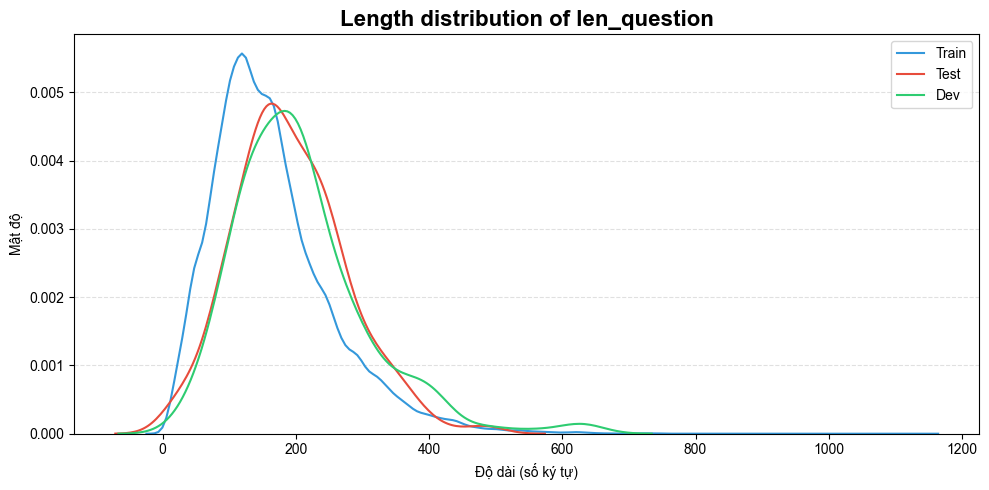

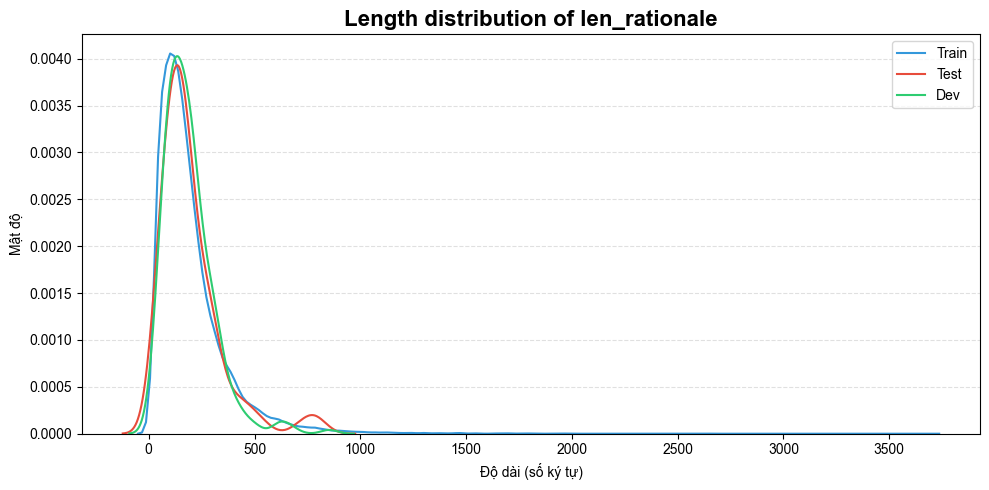

In [16]:
# ---------------------- Độ dài câu hỏi và lời giải ----------------------
colors = ['#3498db', '#e74c3c', '#2ecc71']  

for col in ['len_question', 'len_rationale']:
    plt.figure(figsize=(10, 5))
    for (name, df), color in zip(datasets.items(), colors):
        sns.kdeplot(df[col], label=name, color=color)
    plt.title(f'Length distribution of {col}', fontweight='bold',fontsize=16)
    plt.xlabel('Độ dài (số ký tự)')
    plt.ylabel('Mật độ')
    plt.legend()
    plt.grid(axis='x', visible = False)
    plt.grid(axis='y', linestyle='--', color='lightgray', alpha=0.7)
    plt.tight_layout()
    plt.show()

### Biểu đồ phân phối độ dài câu hỏi (len_question) và lời giải (len_rationale) của tập dữ liệu AQuA cho thấy:
- **Câu hỏi**: **Độ dài trung bình tập Train, Test, và Dev dao động quanh 50-100 từ**, với phần lớn dưới 200 từ. Phân bố lệch phải, tập Train (xanh dương) có tần suất cao nhất.
- **Lời giải**: **Độ dài trung bình tập trung dưới 500 từ**, nhưng có một số lời giải rất dài (lên đến 3500 từ). Phân bố cũng lệch phải, với tập Train chiếm ưu thế về mật độ.
- **Insight**: *Câu hỏi thường ngắn gọn, nhưng lời giải có độ dài biến thiên lớn, cho thấy sự phức tạp và chi tiết trong cách giải thích, đặc biệt ở tập Train.*

/var/folders/zl/w0vj8dg91gg3w47_8p3fp2r00000gn/T/ipykernel_70505/2487308216.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='correct', order=sorted(df['correct'].unique()), palette='Set2')


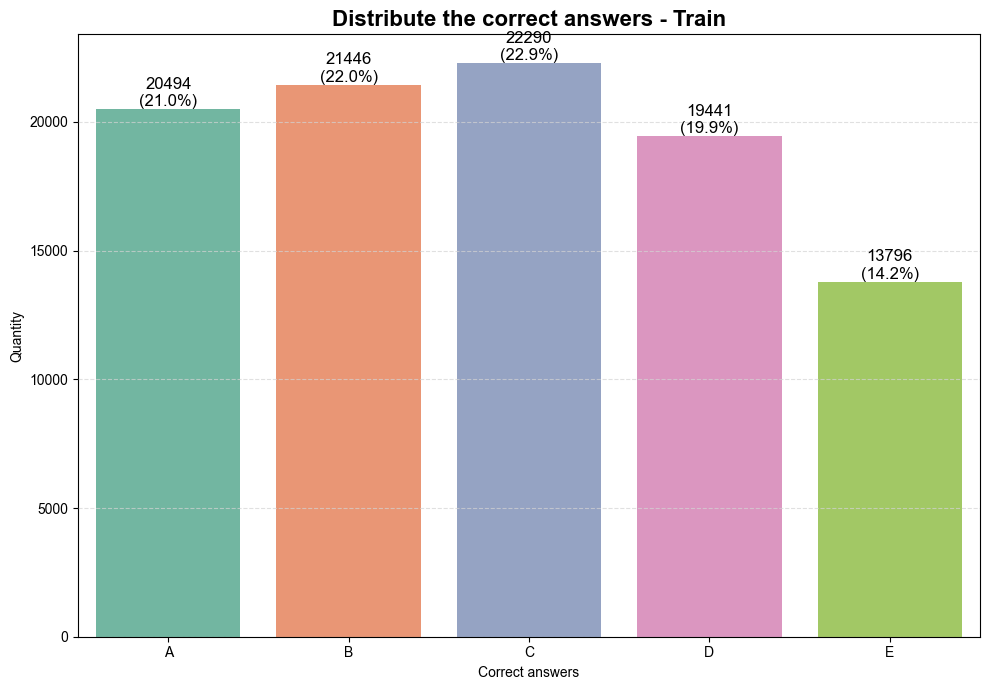

/var/folders/zl/w0vj8dg91gg3w47_8p3fp2r00000gn/T/ipykernel_70505/2487308216.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='correct', order=sorted(df['correct'].unique()), palette='Set2')


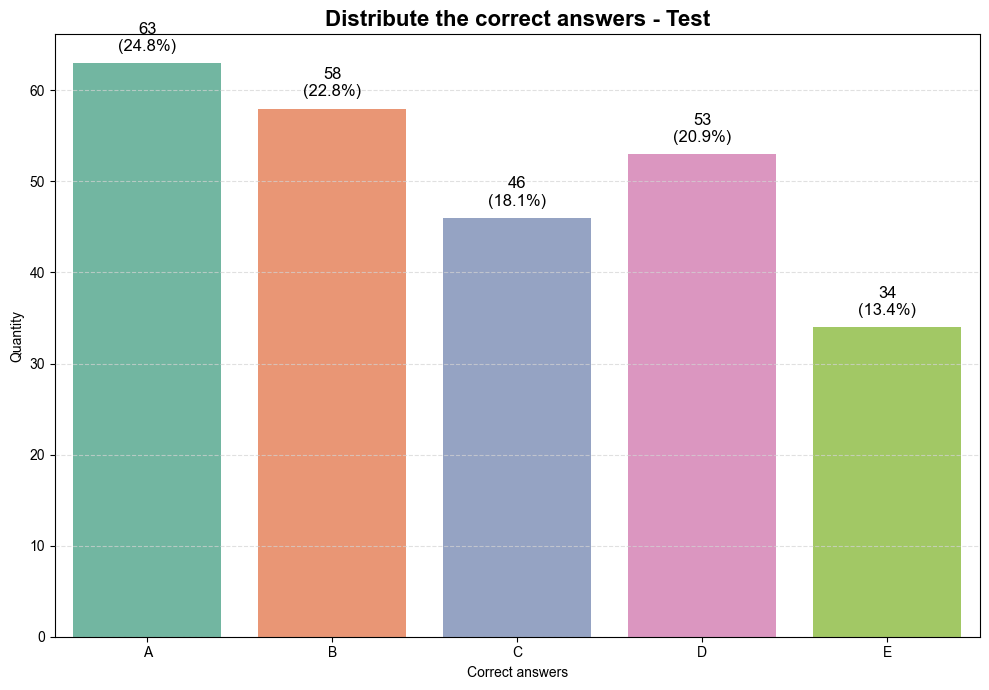

/var/folders/zl/w0vj8dg91gg3w47_8p3fp2r00000gn/T/ipykernel_70505/2487308216.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='correct', order=sorted(df['correct'].unique()), palette='Set2')


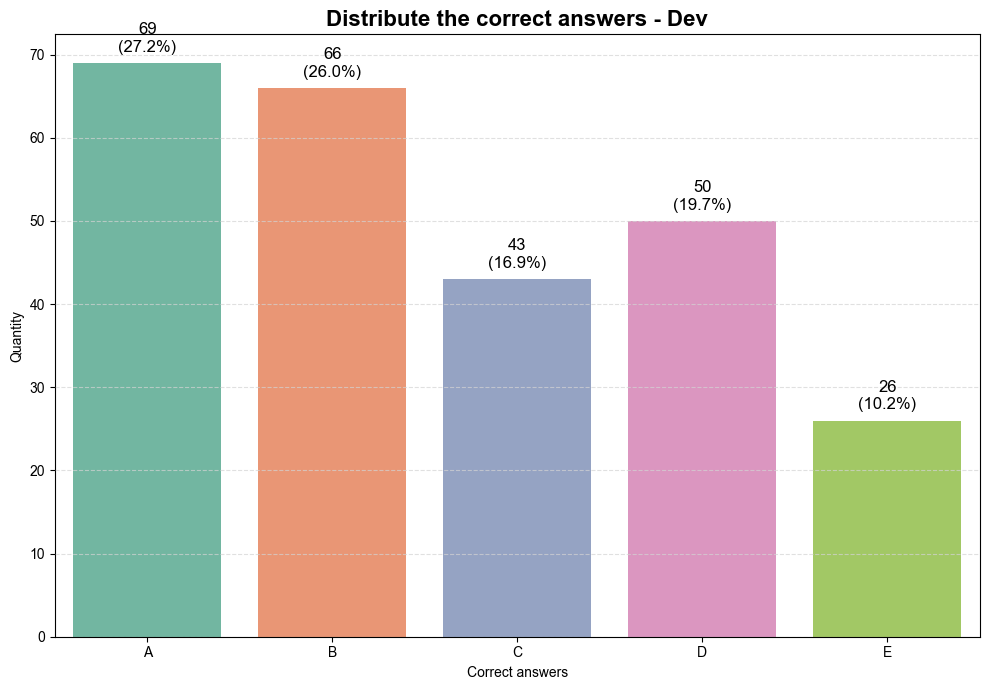

In [15]:
# ---------------------- Phân phối nhãn đúng ----------------------
for name, df in datasets.items():
    plt.figure(figsize=(10, 7))
    
    # Đếm số lượng cho từng giá trị của 'correct'
    count_series = df['correct'].value_counts().sort_index()
    total = len(df)
    
    ax = sns.countplot(data=df, x='correct', order=sorted(df['correct'].unique()), palette='Set2')
    plt.title(f'Distribute the correct answers - {name}', fontweight='bold', fontsize=16)
    plt.xlabel('Correct answers')
    plt.ylabel('Quantity')

    # Hiển thị số lượng và % trên đầu cột
    for p in ax.patches:
        height = p.get_height()
        percentage = 100 * height / total
        ax.text(p.get_x() + p.get_width() / 2,
                height + 1,
                f'{int(height)}\n({percentage:.1f}%)',
                ha='center', va='bottom', fontsize=12)
        
    ax.set_axisbelow(False)
    plt.grid(axis='x', visible=False)
    plt.grid(axis='y', linestyle='--', color='lightgray', alpha=0.7)
    plt.tight_layout()
    plt.show()

### Biểu đồ phân phối đáp án đúng trong tập Train và Test của AQuA cho thấy:
- **Train**: Đáp án đúng phân bố khá đều giữa **A, B, C, D, E, với C (xanh dương) và D (hồng)** có số lượng cao nhất **(khoảng 20,000)**, trong khi **E (xanh lá) thấp nhất**.
- **Test**: Phân bố cũng tương đối đồng đều, **A (xanh lá) và B (cam) dẫn đầu (khoảng 60)**, trong khi **E (xanh lá nhạt) thấp nhất (khoảng 30-40)**.
- **Insight**: *Không có thiên vị rõ rệt về vị trí đáp án đúng, nhưng C và D trong Train, cùng A và B trong Test, có xu hướng xuất hiện nhiều hơn, có thể phản ánh cấu trúc câu hỏi hoặc cách chọn đáp án.*

/var/folders/zl/w0vj8dg91gg3w47_8p3fp2r00000gn/T/ipykernel_70505/3611756815.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(words), y=list(counts), palette='coolwarm')


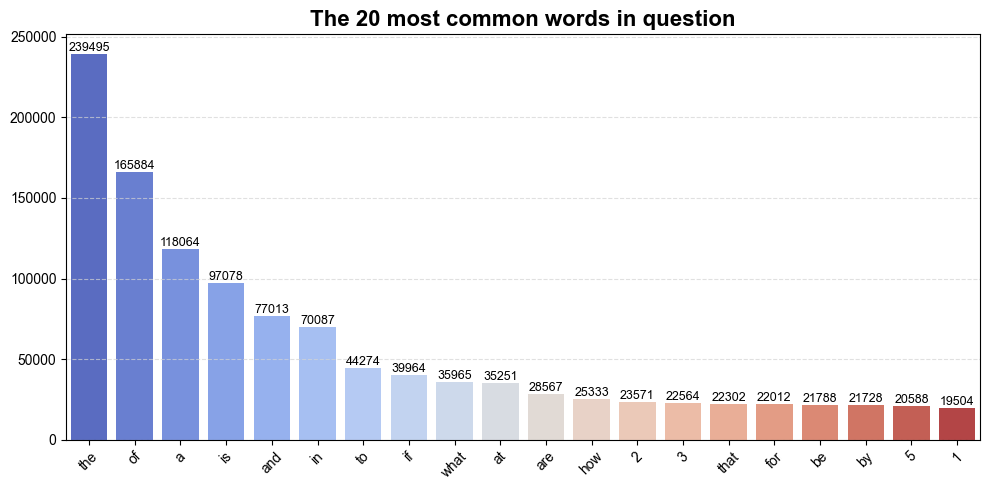

/var/folders/zl/w0vj8dg91gg3w47_8p3fp2r00000gn/T/ipykernel_70505/3611756815.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(words), y=list(counts), palette='coolwarm')


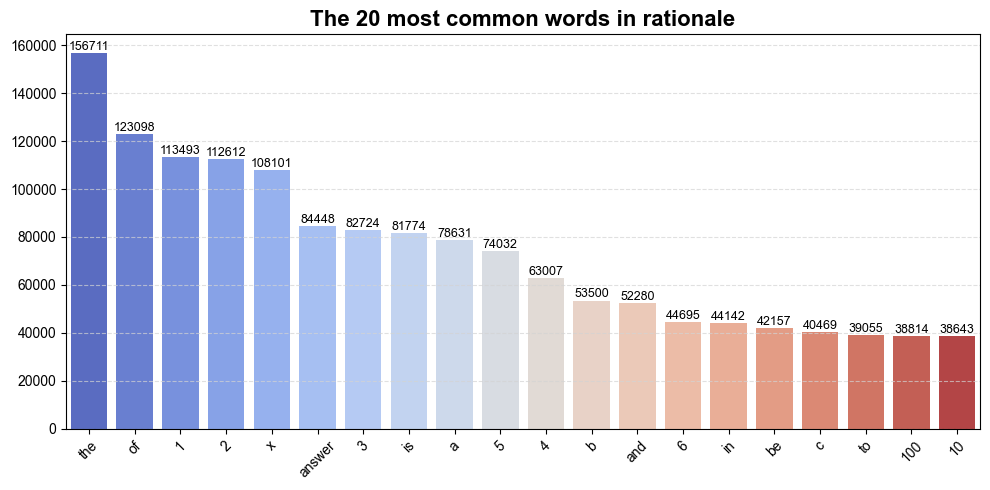

In [23]:
# ---------------------- Tần suất từ phổ biến trong câu hỏi ----------------------
def most_common_words(datasets, field='question', top_n=20):
    all_text = ''
    for df in datasets.values():
        all_text += ' '.join(df[field].astype(str).tolist()).lower()
    
    words = re.findall(r'\b\w+\b', all_text)
    word_freq = Counter(words).most_common(top_n)

    words, counts = zip(*word_freq)
    
    plt.figure(figsize=(10, 5))
    ax = sns.barplot(x=list(words), y=list(counts), palette='coolwarm')
    plt.title(f'The {top_n} most common words in {field}', fontweight='bold', fontsize=16)
    plt.xticks(rotation=45)
    plt.grid(axis='x', visible=False)
    plt.grid(axis='y', linestyle='--', color='lightgray', alpha=0.7)

    # Thêm giá trị số lượng trên từng cột
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2,
                height + 0.5,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()

most_common_words(datasets, field='question')
most_common_words(datasets, field='rationale')

### Biểu đồ tần suất 20 từ phổ biến nhất trong question và rationale của bộ dữ liệu AQuA cho thấy:
- **Question**: Từ **"the"** dẫn đầu với **hơn 20,000 lần xuất hiện**, theo sau là "of" và "a", với tần suất giảm dần. Các từ như "is", "and", "in" cũng phổ biến, nhưng tần suất giảm mạnh sau 5 từ đầu.
- **Rationale**: Từ **"the"** vẫn chiếm ưu thế với **hơn 14,000 lần**, tiếp theo là "of" và "answer". Tần suất giảm dần, với các từ như "is", "and" ít hơn đáng kể, và các từ như "to", "be" xuất hiện ít hơn.
- **Insight**: *Các từ dừng (stop words) như "the", "of", "a" chi phối cả câu hỏi và lời giải, phản ánh cấu trúc ngôn ngữ tự nhiên.*

In [18]:
# ---------------------- Phân tích biểu thức toán học trong rationale ----------------------
def contains_equation(text):
    return bool(re.search(r'[\d]+[*/+-]', text)) or bool(re.search(r'\d+\s*[=]\s*\d+', text))

def analyze_equations():
    for name, df in datasets.items():
        df['has_equation'] = df['rationale'].apply(contains_equation)
        ratio = df['has_equation'].mean()
        print(f" {name} dataset: {ratio:.2%} rationale contains mathematical expressions")

analyze_equations()

 Train dataset: 80.51% rationale contains mathematical expressions
 Test dataset: 80.31% rationale contains mathematical expressions
 Dev dataset: 81.89% rationale contains mathematical expressions


### Biểu đồ cho thấy tỷ lệ các rationale chứa biểu thức toán học trong bộ dữ liệu AQuA:
- **Train**: 80.51% các rationale có biểu thức toán học.
- **Test**: 80.81% các rationale có biểu thức toán học.
- **Dev**: 81.89% các rationale có biểu thức toán học.
- **Insight**: *Hơn 80% rationale trong cả ba tập (Train, Test, Dev) chứa biểu thức toán học, cho thấy tính toán học là yếu tố cốt lõi và nhất quán trong lời giải thích của AQuA.*